</div>


<div style="width: 100%; clear: both;">
  <div style="float: left; width: 50%;">
    <img src="https://www.ucc.edu.co/institucional/acerca-de-la-universidad/Documents/logo_ucc_2018(CURVAS)-01.png" align="left" style="max-width: 100%; height: auto;">
  </div>
  <div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><strong>Laboratorio de Tecnologías Emergentes</strong></p>
    <p style="margin: 0; text-align:right;">Universidad Cooperativa de Colombia, Campus Ibagué-Espinal</p>
    <p style="margin: 0; text-align:right; padding-bottom:;">Facultad de Ingeniería</p>
    <p style="margin: 0; text-align:right; padding-bottom: 100px;">Programa de Ingeniería de Sistemas</p>
  </div>
</div>
<div style="width:100%;">&nbsp;</div>


<h1 align=center><font size = 5>Análisis de Datos con Python - Metodologías de Descubrimiento de Conocimiento</font></h1>

In [1]:
xsZx

NameError: name 'xsZx' is not defined

# CRISP-DM

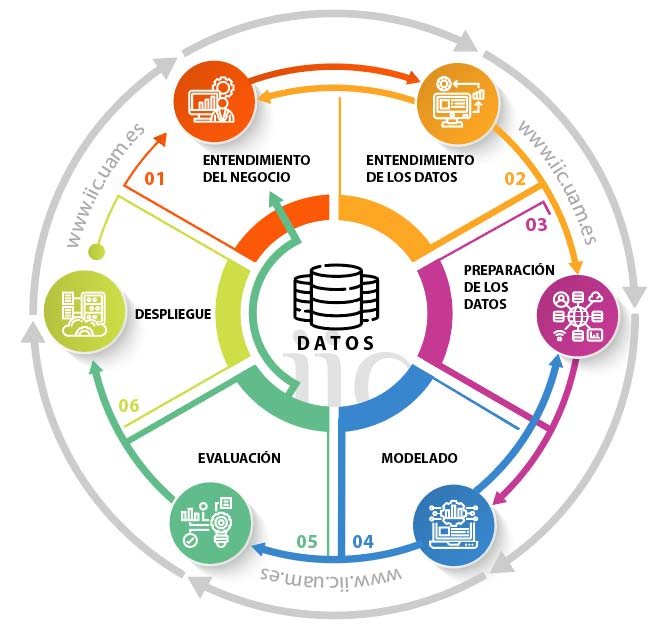

# KDD

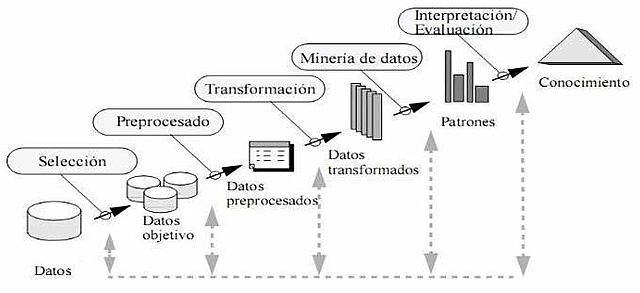

# SEMMA 

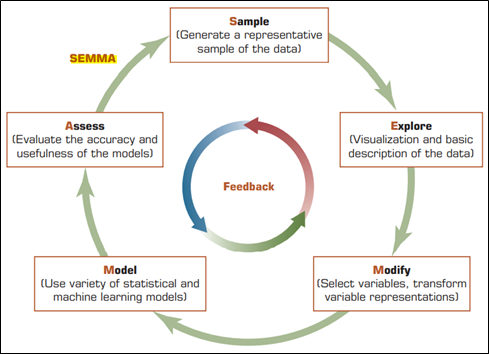![image.png]

<h1>Data Wrangling</h1>


<h3>¡Bienvenido!</h3>

Al terminar este cuaderno habrás aprendido los conceptos básicos sobre Data Wrangling


<h2>Indice</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identificar y manejar valores faltantes</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identificar valores faltantes</a></li>
            <li><a href="https://#deal_missing_values">Manejar valores faltantes</a></li>
            <li><a href="https://#correct_data_format">Corregir el formato de los datos</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Estandarización de los Datos</a></li>
    <li><a href="https://#data_normalization">Normalización de los Datos (centrado/escalado)</a></li>
    <li><a href="https://#binning">Discretización</a></li>
    <li><a href="https://#indicator">Variable Indicadora</a></li>
</ul>

Tiempo Estimado: <strong>30 min</strong>

</div>

<hr>


<h2>¿Cual es la función del Data Wrangling?</h2>


Data Wrangling es el proceso de convertir los datos desde un formato inicial a uno apropiado para su análisis.


<h3>Cual es el ritmo de consumo de combustible (L/100k) de un automovil de diesel?</h3>


<h3>Importar Datos</h3>
<p>
Puedes encontrar el "Conjunto de Datos Automotriz" en el siguiente enlace: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2021-01-01">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 
Usaremos estos datos a lo largo de este curso.   

 <a    href="https://archive.ics.uci.edu/dataset/10/automobile">Ver más..</a>
</p>


<h4>Importar pandas</h4> 


In [5]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Leer los datos desde la URL y añadir los encabezados relacionados.</h2>


URL del conjunto de datos


Este conjunto de datos fue almacenado como un objeto en IBM Cloud, haz clic <a href="https://cloud.ibm.com/registration/trial?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2021-01-01">AQUI</a> para almacenar gratuitamente.


In [1]:
filename = "auto.csv"

La lista de Python <b>headers</b> contiene el nombre de los encabezados


In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Utiliza el método de Pandas <b>read_csv()</b> para cargar los datos desde la dirección web. Establece el parámetro "names" igual al de la lista "headers" de Python.


In [6]:
df = pd.read_csv(filename, names = headers)

Utiliza el método <b>head()</b> para mostrar las primeras cinco filas del dataframe.


In [8]:
# Para ver como se ve el conjunto de datos usaremos el método head().
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como se puede ver, algunos signos de interrogación aparecen en el dataframe; estos son valores faltantes que pueden dificultar nuestro futuro análisis.

<div>¿Como identificamos y manejamos todos aquellos valores que faltan?</div> 

<b>¿Como trabajar con valores faltantes?</b>

Pasos para trabajar con valores faltantes:

<ol>
    <li>identificar los datos faltantes</li>
    <li>manejar los datos faltantes</li>
    <li>corregir el formato de los datos</li>
  </ol>


<h2 id="identify_handle_missing_values">Identificar y manejar valores faltantes</h2>

<h3 id="identify_missing_values">Identificar valores faltantes</h3>
<h4>Convertir "?" a NaN</h4>
En el conjunto de datos del automovil, los datos que faltan aparecen con el signo "?".
Cambiamos "?" por NaN (Not a Numer) el cual es el marcador por defecto de Python para valores faltantes por razones de conveniencia y velocidad de computo. Aqui usamos la función:
<pre>.replace(A, B, inplace = True) </pre>
para reemplazar A por B


In [7]:
import numpy as np

# reemplazar "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


dentify_missing_values

<h4>Evaluar Valores Faltantes</h4>

Los valores que faltan son convertidos al estandar de Python. Usamos las funciones pre establecidas de Python para identificar estos valores. Existen dos métodos para detectar los datos faltantes.

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
El valor de salida es del tipo booleano e indica si el valor pasado como argumento es en verdad alguno de los que faltan.


In [8]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" indica un valor faltante mientras "False" indica que si existe.


<h4>Contar valores faltantes en cada columna</h4>
<p>
Al utilizar un ciclo for en Pyhton podemos darnos cuenta rapidamente de la cantidad de valores faltantes en cada columna. Como se mencionó arriba, "True" representa un valor faltante y "False" un valor presente en el conjunto de datos. En el cuerpo del ciclo for el método ".value_counts()" cuenta el número de valores tipo "True".
</p>


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Con base en el resumén de arriba, cada columna tiene 205 filas de datos, siete columnas que contienen información faltante:

<ol>
    <li>"normalized-losses": 41 datos faltantes</li>
    <li>"num-of-doors": 2 datos faltantes</li>
    <li>"bore": 4 datos faltantes</li>
    <li>"stroke" : 4 datos faltantes</li>
    <li>"horsepower": 2 datos faltantes</li>
    <li>"peak-rpm": 2 datos faltantes</li>
    <li>"price": 4 datos faltantes</li>
</ol>


<h3 id="deal_missing_values">Manejar Valores Faltantes</h3>
<b>¿Como se manejan los valores faltantes?</b>

<ol>
    <li>eliminando datos<br>
        a. eliminar toda la fila<br>
        b. eliminar toda la columna
    </li>
    <li>remplazando datos<br>
        a. remplazarlos por la media<br>
        b. remplazarlos por la frecuencia<br>
        c. remplazarlos en base a otras funciones
    </li>
</ol>


Todas las columnas deberían ser eliminadas solo si la mayoría de las entradas de la columna estan vacias. En nuestro conjunto de datos ninguna de las columnas estan tan vacias como para eliminarlas completamente.
Tenemos cierta libertad de elegir cual método usar para reemplazar los datos; sin embargo, algunos métodos puedieran ser mejores que otros. Se aplicara cada método para muchas columnas distintas:

<b>Remplazar con la Media:</b>

<ul>
    <li>"normalized-losses": 41 datos faltantes , remplazar con la media</li>
    <li>"stroke": 4 datos faltantes , remplazar con la media</li>
    <li>"bore": 4 datos faltantes , remplazar con la media</li>
    <li>"horsepower": 2 datos faltantes , remplazar con la media</li>
    <li>"peak-rpm": 2 datos faltantes , remplazar con la media</li>
</ul>

<b>Remplazar con la Frecuancia:</b>

<ul>
    <li>"num-of-doors": 2 datos faltantes, remplazar con "cuatro". 
        <ul>
            <li>Razón: El 84% de los sedanes es de cuatro puertas. Debido que tener cuatro puertas es mas frecuente, es mas probable que ocurra</li>
        </ul>
    </li>
</ul>

<b>Eliminar toda la fila:</b>

<ul>
    <li>"price": 4 datos faltantes, simplemente se borra toda la columna.
        <ul>
            <li>Razón: El precio es lo que queremos predecir. Cualquier dato de entrada sin precio no puede ser usado para predecir; debido a esto toda fila sin información del precio no es de utilidad</li>
        </ul>
    </li>
</ul>


<h4>Calcular el promedio de la columna</h4>


In [10]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Remplazar "NaN por el valor de la media en la columna "normalized-losses"</h4>


In [11]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

C:\Users\diaz\AppData\Local\Temp\ipykernel_21272\2599940699.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)


In [31]:
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)

<h4>Calcular el valor de la media de la columna 'bore'</h4>


In [13]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


<h4>Remplazar "NaN por el valor de la media</h4>


In [14]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

C:\Users\diaz\AppData\Local\Temp\ipykernel_21272\1952189479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bore"].replace(np.nan, avg_bore, inplace=True)


In [15]:
df["bore"] = df["bore"].replace(np.nan, avg_bore)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #1: </h1>

<b>De acuerdo al ejemplo de arriba, remplaza NaN en la collumna "stroke" por la media.</b>

</div>


In [16]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
avg_stroke=df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [17]:
df["stroke"] = df["stroke"].replace(np.nan, avg_stroke)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

# calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

-->


<h4>Calcular el valor de la media para la columna 'horsepower:</h4>


In [20]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Remplaza "NaN" por el valor de la media:</h4>


In [21]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

C:\Users\diaz\AppData\Local\Temp\ipykernel_21272\3312866579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


<h4>Calcula el valor de la media para la columna 'peak-rpm':</h4>


In [22]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Remplaza "NaN" por el valor de la media:</h4>


In [23]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

C:\Users\diaz\AppData\Local\Temp\ipykernel_21272\2061375298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


Para ver los valores presentes en una columna podemos usar el método ".value_counts()":


In [24]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

Podemos ver que el tipo mas común es el de cuatro puertas. Además podemos usar el método .idxmax()" para calcular automaticamente el tipo mas comun:


In [25]:
df['num-of-doors'].value_counts().idxmax()

'four'

El procedimiento de remplazo es muy similar a lo que hemos visto previamente


In [26]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

C:\Users\diaz\AppData\Local\Temp\ipykernel_21272\2406474689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace(np.nan, "four", inplace=True)


Finalmente, eliminemos todas las filas que no tienen información de precios:


In [27]:
# elimina toda la fila con NaN en la columna "price"
df.dropna(subset=["price"], axis=0, inplace=True)

# restablece el índice debido a que eliminamos dos filas
df.reset_index(drop=True, inplace=True)

In [32]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>¡Bien!</b> Ahora, vamos a obtener el conjunto de datos con valores.


<h3 id="correct_data_format">Corregir el formato de los datos</h3>
<b>¡Casi hemos llegado!</b>
<p>El último paso para limpiar los datos es revisar y asegurar que su formato sea el correcto (int, float, text u otro.)</p>

Con Pandas sería

<p><b>.dtype()</b> para revisar el tipo de dato</p>
<p><b>.astype()</b> para cambiar el tipo de dato</p>


<h4>Vamos a listar los tipos de datos para cada columna</h4>


In [33]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Como podemos ver arriba, algunas columnas no tienen el tipo correcto de dato. Las variables numericas deben ser de tipo 'float' o 'int', y las variables con cadenas como pueden ser las categorias deben ser de tipo 'object'. Por ejemplo, las variables 'bore' y 'stroke' son valores numericos que describen los motores, asi que podemos esperar que sean del tipo 'float' o 'int'; sin embargo, se muestran como tipo 'objetc'. Debemos convertir los tipos de datos al formato apropiado para cada columna utilizando el método "astype()".
</p> 


<h4>Convertir el tipo de datos al formato apropiado</h4>


In [34]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h4>Listemos las columnas despues de la conversión</h4>


In [35]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>¡Perfecto!</b>

Ahora, finalmente obtenemos el conjunto de datos limpio, sin valores faltantes y en un formato correcto.


<h2 id="data_standardization">Estandarización de los Datos</h2>
<p>
Los datos normalmente se colectan desde distintas agencias con formatos distintos.
(La estandarización de datos es también un termino para un tipo particular de normalización donde restamos la media y la dividimos por la desviación estandar).
</p>

<b>¿Qué es la estandarización?</b>

<p>La estandarización es el proceso de transformar datos en un formato común que permita al investigador realizar comparaciones significativas.
</p>

<b>Ejemplo</b>

<p>Convertir m.p.g (millas por galón) a L/100km:</p>
<p>En nuestro conjunto de datos, las columnas de consumo de combustible "city-mpg" y "highway-mpg" estan representadas por m.p.g. (millas por galón). Deberás asumir que estamos desarrollando una aplicación en un país que acepte el estandar de consumo en L/100km.
</p>
<p>¿Es necesario <b>transformar los datos</b> para convertir m.p.g. en L/100km?</p>


<p>La formula de conversión es<p>
L/100km = 235 / m.p.g.
<p>Podemos realizar muchas operaciones matematicas directamente en Pandas.</p>


In [36]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [37]:
# Convertir m.p.g. a L/100km mediante una operación matematica (235 dividido por m.p.g.)
df['city-L/100km'] = 235/df["city-mpg"]

# revisar los datos transformados
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #2: </h1>

<b>De acuerdo al ejemplo de arriba, convierte m.p.g. a L/100km en la columna "highway-mpg" y cambia el nombre de la columna a "highway-L/100km".</b>

</div>


In [44]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar

# Convertir m.p.g. a L/100km mediante una operación matemática (235 dividido por m.p.g.)
df['highway-L/100km'] = 235/df["highway-mpg"]

# Renombrar la columna de "highway-mpg" a "highway-L/100km"
df.rename(columns={'highway-mpg': 'highway-L/100km'}, inplace=True)

# Revisar los datos transformados
df.head()


KeyError: 'highway-mpg'

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

-->


<h2 id="data_normalization">Normalización de los Datos</h2>

<b>¿Por que debemos normalizar los datos?</b>

<p>La normalización es el proceso de transformar los valores de algunas variables dentro de un rango similar. La normalización típica incluye el redimensionado de las variables para que el promedio sea 0 y la varianza 1, o para que los valores del rango sean entre 0 y 1.
</p>

<b>Ejemplo</b>

<p>Para hacer una demostración, digamos que queremos redimensionar las columnas "length", "width" y "height"</p>
<p><b>Objetivo:</b>Normalizar las variables para que los rangos de sus valores se encuentren entre 0 y 1.</p>
<p><b>Aproximación:</b> remplazar el valor original por (valor original)/(valor máximo)</p>


In [45]:
# intercambia (valor original) por (valor original)/(valor máximo)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta #3: </h1>

<b>De acuerdo al ejemplo anterior, normaliza la columna "height".</b>

</div>


In [46]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
# intercambia (valor original) por (valor original)/(valor máximo)
df['height'] = df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

-->


Podemos ver que hemos normalizado "length", "width" y "height" en el rango \[0,1].


<h2 id="binning">Discretización</h2>
<b>¿Qué es la discretización?</b>
<p>
    Discretizar es el proceso de transformar variables numericas continuas en 'contenedores' discretos para el análisis agrupado.
    </p>

<b>Ejemplo: </b>

<p>En nuestro conjunto de datos, "horsepower" es una variable con valor en el rango de 48 a 288, tiene 57 valores únicos. ¿Qué pasaría si solo nos ocuparamos de las diferencias de precio entre automoviles con altos, medios y pocos caballos de fuerza (3 tipos)? ¿Podriamos reacomodarlos dentro de tres 'contenedores' para facilitar el análisis? </p>

<p>Usaremos el método de Pandas 'cut' para segmentar la columna 'horsepower' en 3 contenedores.</p>


<h3>Ejemplo de discretización de datos con Pandas</h3>


Corregir el formato de los datos


In [ ]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Grafiquemos el histograma de los caballos de fuerza para ver la apariencia de su distribución.


In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# establece las etiquetas x/y y muestra el título 
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Quisieramos 3 contenedores de igual tamaño para poder utilizar la función <code>linspace(start_value, end_value, numbers_generated</code> de numpy.</p>
<p>Debido a que queremos incluir el valor mínimo de caballos de fuerza que queremos establecer start_value=min(df["horsepower"]).</p>
<p>Debido a que queremos incluir el valor máximo de caballos de fuerza que queremos establecer end_value=max(df["horsepower"]).</p>
<p>Debido a que estamos construyendo 3 contenedores de igual longitud debe haber 4 divisores, asi que numbers_generated=4.</p>


Construimos un arreglo tipo contenedor, desde un valor mínimo al máximo y un ancho de bando calculado arriba. Los contenedores seran valores usados para determinar cuando uno de ellos termina y otro comienza.


In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

Establecemos los nombres de grupo:


In [ ]:
group_names = ['Low', 'Medium', 'High']

Aplicamos la función "cut" para determinar a quien pertenece cada valor de "df\['horsepower']".


In [ ]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

Veamos el número de vehiculos en cada contenedor.


In [ ]:
df["horsepower-binned"].value_counts()

Dibujemos la distribución de cada contenedor.


In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# establece las etiquetas x/y y muestra el título 
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Revisa el dataframe de arriba con cuidado y encontrarás que la última columna da a los contenedores para "horsepower" 3 categorias (("Low","Medium" and "High"). 
</p>
<p>
    Hemos reducido exitosamente el número de intervalos de 57 a 3.
    </p>


<h3>Visualización de Contenedores</h3>
Normalmente un histograma se utiliza para visualizar la distribución de los contenedores creados arriba.


In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# Dibuja el histograma del atributo "horsepower" con bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# establece las etiquetas x/y y muestra el título 
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for attribute "horsepower".


<h2 id="indicator">Variable Indicadora (o variable tonta)</h2>
<b>¿Qué es una variable indicadora?</b>
<p>
    Es una variable numerica usada para etiquetar categorías. Son llamadas "tonta" porque los números en ellas no tienen ningun significado.

</p>

<b>¿Para que se usa una variable indicadora?</b>

<p>
    Para poder usar variables para el analisis de regresión en los módulos posteriores.

</p>
<b>Ejemplo</b>
<p>
    Vemos que la columna "fuel-type" tiene dos valores únicos, "gas" o "diesel". La regresión no entiende palabras, solo números. Para usar este atributo en el análisis de regresión debemos convertir "fuel-type" en una variable indicadora.

</p>

<p>Usaremos el método Pandas 'get_dummies' para asignarle un valores numericos a difentes categorias de tipo de combustible.

</p>


In [ ]:
df.columns

obtener variables indicadoras y asignarlas al dataframe "dummy_variable\_1"


In [ ]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

Cambiar los nombres de las columnas para clarificar


In [ ]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

Ahora tenemos el valor 0 para representar "gas" y 1 para "diesel" en la columna "fuel-type". Insertaremos esta columna en el nuestro dataset original.


In [ ]:
# combinar el dataframe "df" y "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# eliminar la columna original "fuel-type" de "df" 
df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df.head()

Las últimas dos columnas ahora son las representación de la variable indicadora del tipo de combustible. Ahora es unos y ceros.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #4: </h1>

<b>Al igual que arriba, crear una variable indicadora de "aspiration": "std" a 0, mientras "turbo" a 1. </b>

</div>


In [ ]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

-->


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #5: </h1>

<b>Combinar el nuevo dataframe con el original y despues elimina la columna 'aspiration' </b>

</div>


In [ ]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

-->


guarda el nuevo csv


In [ ]:
df.to_csv('clean_df.csv')

<h1>Gracias por completar este cuaderno</h1>


Aquí tienes la tabla con las columnas adicionales: la **traducción de la variable al español** y una **descripción en español** de cada una.  

| Variable Name          | Traducción al Español  | Role    | Type         | Description (EN)                                      | Descripción (ES)                                       | Units | Missing Values |
|------------------------|----------------------|---------|--------------|-------------------------------------------------------|--------------------------------------------------------|-------|---------------|
| price                  | precio               | Feature | Continuous   | continuous from 5118 to 45400                         | Precio del vehículo en dólares                        |       | yes           |
| highway-mpg           | consumo-carretera     | Feature | Continuous   | continuous from 16 to 54                              | Consumo de combustible en carretera (millas por galón) |       | no            |
| city-mpg              | consumo-ciudad        | Feature | Continuous   | continuous from 13 to 49                              | Consumo de combustible en ciudad (millas por galón)   |       | no            |
| peak-rpm              | rpm-máximo            | Feature | Continuous   | continuous from 4150 to 6600                          | Revoluciones por minuto máximas del motor             |       | yes           |
| horsepower            | potencia              | Feature | Continuous   | continuous from 48 to 288                             | Potencia del motor medida en caballos de fuerza (HP)  |       | yes           |
| compression-ratio     | relación-compresión   | Feature | Continuous   | continuous from 7 to 23                               | Relación de compresión del motor                      |       | no            |
| stroke               | carrera                | Feature | Continuous   | continuous from 2.07 to 4.17                          | Distancia del pistón en el cilindro en cada ciclo     |       | yes           |
| bore                 | diámetro-cilindro      | Feature | Continuous   | continuous from 2.54 to 3.94                          | Diámetro del cilindro del motor                       |       | yes           |
| fuel-system          | sistema-combustible    | Feature | Categorical  | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi          | Tipo de sistema de inyección de combustible           |       | no            |
| engine-size          | tamaño-motor          | Feature | Continuous   | continuous from 61 to 326                             | Tamaño del motor medido en centímetros cúbicos (cc)   |       | no            |
| num-of-cylinders     | número-cilindros       | Feature | Integer      | eight, five, four, six, three, twelve, two           | Número de cilindros en el motor                       |       | no            |
| engine-type         | tipo-motor             | Feature | Categorical  | dohc, dohcv, l, ohc, ohcf, ohcv, rotor               | Tipo de motor según su configuración interna          |       | no            |
| curb-weight         | peso-vacío             | Feature | Continuous   | continuous from 1488 to 4066                          | Peso del vehículo sin carga ni pasajeros (kg)         |       | no            |
| height              | altura                 | Feature | Continuous   | continuous from 47.8 to 59.8                          | Altura del vehículo medida en pulgadas                |       | no            |
| width               | ancho                  | Feature | Continuous   | continuous from 60.3 to 72.3                          | Ancho del vehículo medido en pulgadas                 |       | no            |
| length              | longitud               | Feature | Continuous   | continuous from 141.1 to 208.1                        | Longitud total del vehículo medida en pulgadas        |       | no            |
| wheel-base          | distancia-ejes         | Feature | Continuous   | continuous from 86.6 to 120.9                         | Distancia entre los ejes delantero y trasero          |       | no            |
| engine-location     | ubicación-motor        | Feature | Binary       | front, rear                                          | Ubicación del motor en el vehículo (frontal o trasero) |       | no            |
| drive-wheels        | tracción               | Feature | Categorical  | 4wd, fwd, rwd                                        | Tipo de tracción del vehículo (4x4, delantera, trasera) |       | no            |
| body-style          | tipo-carrocería        | Feature | Categorical  | hardtop, wagon, sedan, hatchback, convertible        | Tipo de carrocería del vehículo                       |       | no            |
| num-of-doors        | número-puertas         | Feature | Integer      | four, two                                           | Número de puertas del vehículo                        |       | yes           |
| aspiration          | aspiración             | Feature | Binary       | std, turbo                                          | Tipo de aspiración del motor (normal o turbo)         |       | no            |
| fuel-type           | tipo-combustible       | Feature | Binary       | diesel, gas                                         | Tipo de combustible usado (diésel o gasolina)         |       | no            |
| make                | marca                  | Feature | Categorical  | alfa-romero, audi, bmw, chevrolet, etc.              | Marca del fabricante del vehículo                     |       | no            |
| normalized-losses   | pérdidas-normalizadas  | Feature | Continuous   | continuous from 65 to 256                            | Pérdidas normalizadas por seguros                     |       | yes           |

Si necesitas ajustes o más detalles, dime y lo edito.